<a href="https://colab.research.google.com/github/myGithubAccount26/Biostatistics/blob/master/Biostatistics_Lab_4_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice Seed Classification

How will you classify the bellow two images?

![1rice](https://github.com/totti0223/deep_learning_for_biologists_with_keras/raw/master/assets/11.jpg) Proper Shaped Rice Seed

![2rice](https://github.com/totti0223/deep_learning_for_biologists_with_keras/raw/master/assets/141.jpg) Broken Rice Seed



In [1]:
import numpy as np # Import numpy (np)
import math, os, sys # Import math, os, and sys
import itertools # Import itertools

import matplotlib.pyplot as plt # Import matplotlib.pyplot for ploting (plt)
plt.style.use('default') 
from scipy import ndimage

# Below we are importing specific functions from within skimage in order to read, save, and manipulate images
from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.transform import resize

# Importing functions in order to make predictions and create confusion matrices for validation
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    #code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [4]:
!#we will use the rice seed image datset
!apt-get install subversion > /dev/null
!svn export https://github.com/totti0223/deep_learning_for_biologists_with_keras/trunk/notebooks/data/image image > /dev/null

svn: E155000: Destination directory exists; please remove the directory or use --force to overwrite
svn: E155000: 'image' already exists


In [7]:
#this command below see inspects part of the files which have been downloaded from the cell above
!ls image # within the downloaded image file, we have a train and test folder and .txt files
!ls image/train # within the train folder, we have two a folder with images of broken rice seeds and proper rice seeds
!ls image/train/proper # Here we take a look at the images of rice seeds classified as 'proper'

test  test.txt	train  train.txt
broken	proper
100.jpg  117.jpg  132.jpg  15.jpg   22.jpg  39.jpg  56.jpg  73.jpg  90.jpg
101.jpg  118.jpg  133.jpg  16.jpg   23.jpg  40.jpg  57.jpg  74.jpg  91.jpg
102.jpg  119.jpg  134.jpg  17.jpg   24.jpg  41.jpg  58.jpg  75.jpg  92.jpg
103.jpg  11.jpg   135.jpg  181.jpg  25.jpg  42.jpg  59.jpg  76.jpg  93.jpg
104.jpg  120.jpg  136.jpg  183.jpg  26.jpg  43.jpg  60.jpg  77.jpg  94.jpg
105.jpg  121.jpg  137.jpg  187.jpg  27.jpg  44.jpg  61.jpg  78.jpg  95.jpg
106.jpg  122.jpg  138.jpg  188.jpg  28.jpg  45.jpg  62.jpg  79.jpg  96.jpg
107.jpg  123.jpg  139.jpg  18.jpg   29.jpg  46.jpg  63.jpg  80.jpg  97.jpg
108.jpg  124.jpg  13.jpg   190.jpg  30.jpg  47.jpg  64.jpg  81.jpg  98.jpg
109.jpg  125.jpg  140.jpg  192.jpg  31.jpg  48.jpg  65.jpg  82.jpg  99.jpg
110.jpg  126.jpg  143.jpg  193.jpg  32.jpg  49.jpg  66.jpg  83.jpg
111.jpg  127.jpg  148.jpg  197.jpg  33.jpg  50.jpg  67.jpg  84.jpg
112.jpg  128.jpg  149.jpg  198.jpg  34.jpg  51.jpg  68.jpg  85.jpg
113

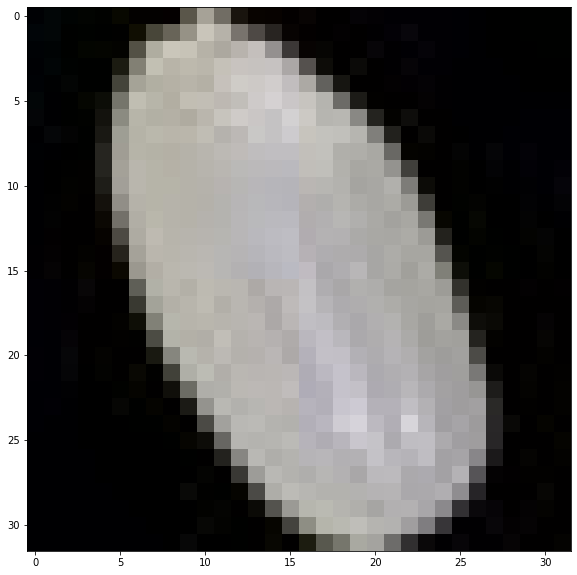

In [24]:
#let's visualize a single file
image = imread("image/train/proper/100.jpg")/255
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
# For reference, this image: 100.jpg is an array of values, similar to the array we saw in the udemy youtube video on image characteristics
image

In [20]:
for root, dirs, files in os.walk("image/train"):
  print(root)
  print(dirs)
  print(files)

image/train
['proper', 'broken']
[]
image/train/proper
[]
['11.jpg', '133.jpg', '119.jpg', '25.jpg', '105.jpg', '32.jpg', '51.jpg', '28.jpg', '96.jpg', '78.jpg', '97.jpg', '88.jpg', '36.jpg', '108.jpg', '55.jpg', '122.jpg', '106.jpg', '59.jpg', '40.jpg', '136.jpg', '198.jpg', '85.jpg', '87.jpg', '103.jpg', '23.jpg', '39.jpg', '84.jpg', '131.jpg', '129.jpg', '30.jpg', '114.jpg', '94.jpg', '34.jpg', '48.jpg', '151.jpg', '46.jpg', '62.jpg', '18.jpg', '17.jpg', '45.jpg', '81.jpg', '54.jpg', '20.jpg', '43.jpg', '33.jpg', '41.jpg', '14.jpg', '102.jpg', '113.jpg', '193.jpg', '16.jpg', '61.jpg', '95.jpg', '115.jpg', '70.jpg', '57.jpg', '139.jpg', '67.jpg', '98.jpg', '65.jpg', '91.jpg', '149.jpg', '143.jpg', '154.jpg', '50.jpg', '126.jpg', '183.jpg', '52.jpg', '83.jpg', '80.jpg', '109.jpg', '42.jpg', '140.jpg', '190.jpg', '22.jpg', '69.jpg', '21.jpg', '90.jpg', '24.jpg', '112.jpg', '44.jpg', '79.jpg', '27.jpg', '58.jpg', '72.jpg', '127.jpg', '148.jpg', '64.jpg', '37.jpg', '125.jpg', '60.jpg', '

In [25]:
#load training dataset
X_train = []
y_train = []

for root, dirs, files in os.walk("image/train"): # Break down the path to the images, root is the parent folder (test/train). dir is the subfolder indicating the 'proper' rice seeds and 'broken' rice seeds. files are the individual jpg images
    files = [x for x in files if x.endswith(".jpg")] # ensure that everything we read into files is an image array that ends with '.jpg'
    for file in files:
        image_path = os.path.join(root, file)
        
        image = imread(image_path)/255. # Read in the image and dived each array value by 255 to standardize to a 0-1 intensity scale
        image = resize(image,(28,28)) # Resize the image so it is viewable
        X_train.append(image) # Append the image to the X_train list
        category = os.path.split(root)[-1]
        if category == "proper": # Check if the image is in the 'proper' folder or if it is in the 'broken' folder. 
            y_train.append(0) # Append 0 for the dependent variable (Y) if the image is in the 'proper' folder
        else:
            y_train.append(1) # Append 1 for the dependent variable (Y) is the image is in the 'broken' folder
X_train = np.array(X_train)
y_train = np.array(y_train)



#load test dataset and repeat the steps above for that dataset
X_test = []
y_test = []

for root, dirs, files in os.walk("image/test"):
    files = [x for x in files if x.endswith(".jpg")]
    for file in files:
        image_path = os.path.join(root, file)
        
        image = imread(image_path)/255.
        image = resize(image,(28,28))
        X_test.append(image)        
        category = os.path.split(root)[-1]
        if category == "proper":
            y_test.append(0)
        else:
            y_test.append(1)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Let's take a look at the dimensions of the test and train datasets
print("train dataset shape is:", X_train.shape,y_train.shape) 
print("test dataset shape is:", X_test.shape,y_test.shape)

train dataset shape is: (377, 28, 28, 3) (377,)
test dataset shape is: (20, 28, 28, 3) (20,)


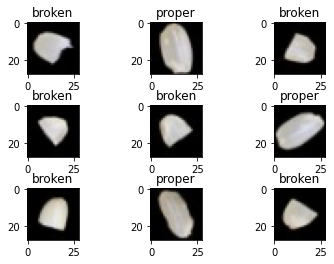

In [7]:
plt.subplots_adjust(wspace=0.4, hspace=0.6) # Set the space for the suplots

index = np.random.randint(0,X_train.shape[0],size=9) # Create an array of 9 random numbers from 0 to the number of images we have in our training set (377)

for i, idx  in enumerate(index):
    plt.subplot(3,3,i+1) # add to the subplot space we have created
    
    if y_train[idx] == 0: # use the classification in the dependent variable to title the plots as being 'proper' or 'broken'
        label = "proper"
    else:
        label = "broken"
    plt.title(label) # Add the title we just created
    plt.imshow(X_train[idx]) # Plot the image saved in the X_train dataset on index 'idx'

(28, 28, 3)


Text(0.5, 1.0, 'original')

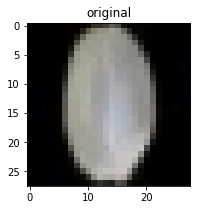

In [42]:
#Let's try it for one image
image = X_train[0]

#the original image
print(image.shape) # Shows us the dimensions of the image object
plt.figure(figsize=(3,3)) # Set figure size
plt.imshow(image) # Plot the image
plt.title("original") # Set a title for the image we just plotted

(28, 28)


Text(0.5, 1.0, 'gray converted')

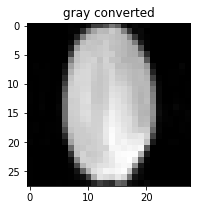

In [50]:
#gray conversion
gray = rgb2gray(image) # This line will convert the image we have to greyscale, each rgb combination is converted to a single number and that number can then be used as an intensity
print(gray.shape)
plt.figure(figsize=(3,3))
plt.imshow(gray, cmap=plt.cm.gray) # The cmap is required here otherwise the colors appear inverted
plt.title("gray converted")

In [ ]:
gray

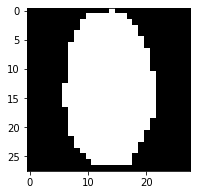

In [51]:
#binary conversion
threshold = threshold_otsu(gray) #This line computes a threshold from a greyscale image, the threshold marks an intensity value which separates the foreground from the background of a greyscale image
binary = gray > threshold # Set a binary representation of whether the pixel in the image is above or below the threshold (whether it is foreground or background) 
plt.figure(figsize=(3,3)) # Set figure size
plt.imshow(binary, cmap=plt.cm.gray) # Plot the binary image so we are returned a pure white and black image

In [ ]:
binary

now that we have a nice binary image, we can isolate the region of rice seed which corresponds to the white region of the image above.

In [61]:
label_im, nb_labels = ndimage.label(binary) # This line of code will label the binary array with 1s and 0s
regionprops = measure.regionprops(label_im, intensity_image=gray) # Using the grayscale image here we convert the labels into a region
regionprop = regionprops[0] # Subsetting to the first list element for easy measurement returns

print("area is",regionprop.area) # Print the area of the region
print("major axis length is", regionprop.major_axis_length) # Print the length of the major axis, we can see on the binary image above that the major axis is close to the full size of the plot 28pixels
print("minor axis length is", regionprop.minor_axis_length) # Print the length of the minor axis

area is 332
major axis length is 27.110738879206334
minor axis length is 15.628814201948895


In [68]:
#bundling the above into a function
def quantify_area(image):
    gray = rgb2gray(image) # Converts to greyscale
    threshold = threshold_otsu(gray) # Find the threshold to outline out image
    binary = gray > threshold # Set binary representation of the image
    label_im, nb_labels = ndimage.label(binary) # add labels for conversion to a region
    regionprops = measure.regionprops(label_im, intensity_image=gray) # Measure the region and return a region object
    regionprop = regionprops[0]
    area = regionprop.area # Calculate the area of the region
    return area

#test
area = quantify_area(image)
print(area)

332


In [70]:
# Here we are calculating the area for each image in our train dataset using the function we defined in the above step
X_train_area = []
for image in X_train:
    area = quantify_area(image)
    X_train_area.append(area)

# Repeating the area calculation for every image in our test dataset
X_test_area = []
for image in X_test:
    area = quantify_area(image)
    X_test_area.append(area)

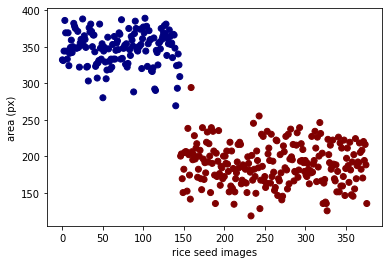

In [72]:
#check the calculated data area value of training dataset
plt.scatter(range(len(X_train_area)),X_train_area,c=y_train,cmap="jet") # For each image in our train dataset, we are plotting the area we calculated on the Y-axis. Helps us visually see the split between the areas of 'proper' and 'broken' rice seeds
plt.xlabel("rice seed images") # Don't forget to add labels on the x axis
plt.ylabel("area (px)") # Don't forget to add labels on the y axis
plt.show()

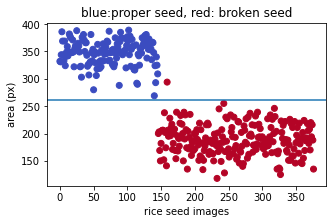

Confusion matrix, without normalization


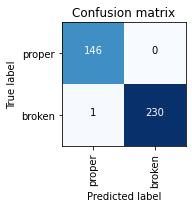

In [87]:
#define an area threshold that can seperate the two classes
#must change from the default value or it won't seperate nicely.
#run this code once and try the suitable value that can seperate blue and red with the horizontal lines
area_threshold = 261


#classify whether the image is a proper seed or a broken seed according to the area_threshold value
train_y_pred = []
for area in X_train_area:
    if area > area_threshold:
        train_y_pred.append(0)
    else:
        train_y_pred.append(1)
        

#plot scatter with threshold line
plt.figure(figsize=(5,3))
plt.scatter(range(len(X_train_area)),X_train_area,c=y_train,cmap=plt.cm.coolwarm) # Plot the scatter plot similar to how we plotted above
plt.axhline(y=area_threshold) # Draw horizontal line on the plot to mark where our threshold has been set
plt.title("blue:proper seed, red: broken seed") # Don't forget to set the plot title
plt.xlabel("rice seed images") # Don't forget to add labels on the x axis
plt.ylabel("area (px)") # Don't forget to add labels on the y axis
plt.show()

#calculate confusion matrix
cnf = confusion_matrix(y_train, train_y_pred) # This returns a confusion matrix indicating whether our prediction was mis-classified or not

#confusion matrix in figure
plt.figure(figsize=(3,3))
plot_confusion_matrix(cnf, classes=["proper","broken"]) # Using the function we defined above, here we are cleaning up the confusion matrix output and labeling it for easy interpretation

plt.show()

In [90]:
for i in range(len(X_train)):
  if y_train[i] != train_y_pred[i]:
    print(i)

159


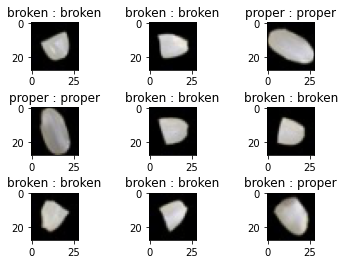

In [111]:
# Let's take a look at the seed that was mis-classified compared to a random set of proper and broken seeds

plt.subplots_adjust(wspace=0.2, hspace=0.8) # Set the space for the suplots

index = np.random.randint(0,X_train.shape[0],size=8) # Create an array of 9 random numbers from 0 to the number of images we have in our training set (377)
for i in range(len(X_train)):
  if y_train[i] != train_y_pred[i]:
    index = np.append(index, i)

for i, idx  in enumerate(index):
    plt.subplot(3,3,i+1) # add to the subplot space we have created
    
    if y_train[idx] == 0: # use the classification in the dependent variable to title the plots as being 'proper' or 'broken'
        label_1 = "proper"
    else:
        label_1 = "broken"
    if train_y_pred[idx] == 0: # use the classification in the dependent variable to title the plots as being 'proper' or 'broken'
        label_2 = "proper"
    else:
        label_2 = "broken"
    label = label_1 + " : " + label_2
    plt.title(label) # Add the title we just created
    plt.imshow(X_train[idx]) # Plot the image saved in the X_train dataset on index 'idx'

# Interesting to see that the size of the incorrectly classified seed (element 9) is comparable to a proper seed, and could be mis-classified even by a human. 
# Maybe the "jaggedness" of the ends should be considered to boost performance

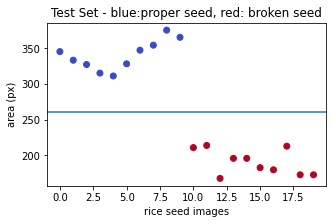

Confusion matrix, without normalization


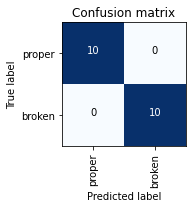

In [113]:
#evaluate it with the test dataset
test_y_pred = []
for area in X_test_area:
    if area > area_threshold:
        test_y_pred.append(0)
    else:
        test_y_pred.append(1)
        
#plot scatter with threshold line
plt.figure(figsize=(5,3))
plt.scatter(range(len(X_test_area)),X_test_area,c=y_test,cmap=plt.cm.coolwarm)
plt.axhline(y=area_threshold)
#plt.plot([100,0],[100,350],'k-',lw=2)
plt.title("Test Set - blue:proper seed, red: broken seed") # Don't forget to set the plot title
plt.xlabel("rice seed images") # Don't forget to add labels on the x axis
plt.ylabel("area (px)") # Don't forget to add labels on the y axis
plt.show()

#calculate confusion matrix
cnf = confusion_matrix(y_test, test_y_pred)

#confusion matrix in figure
plt.figure(figsize=(3,3))
plot_confusion_matrix(cnf, classes=["proper","broken"])
plt.show()

correct label is:  proper
predicted label is:  proper


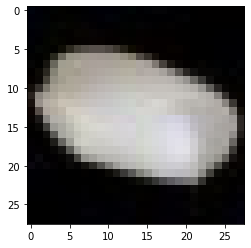

In [155]:
# Build a classifier to perform our above procedure at the call of a function and return a predicted value of 1 or 0

def manual_classifier(image,area_threshold):
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    regionprop = regionprops[0]
    area = regionprop.area
    if area > area_threshold:
        return 'proper'
    else:
        return 'broken'

# get a image from test dataset #value must be lower than the size of the test dataset(20-1)
n = np.random.randint(0, 20-1) # Randomly pick a value between 0-19
image = X_test[n]

# Define the label based on success or failure
if y_test[n] == 1: 
  label = 'broken'
else:
  label = 'proper'

# Manually set a threshold to test
area_threshold = 200

# Run the classifier defined above
prediction = manual_classifier(image,area_threshold)

# Return results of the classifier and the image for varification
plt.imshow(image)
print("correct label is: ",label)
print("predicted label is: ",prediction)